In [2123]:
import numpy as np
import matplotlib.pyplot as plt
import functools
import itertools
from itertools import chain


In [2124]:
# config = {
#     "half_pop_size" : 20,
#     "problem_dim" : 1,
#     "gene_min_val" : 2,
#     "gene_max_val" : 3,
#     "mutation_power_ratio" : 1.05,
# }

# graph = {
#     '1': {'3': 54},
#     '2': {'3': 68},
#     '3': {'1': 54, '2': 68}
# }

# print(graph)
# convert_graph_to_array = [[int(source), int(target), weight] if target != '0' else [int(source), int(target), 0] for source, edges in graph.items() for target, weight in edges.items()]
# print(convert_graph_to_array)

In [2125]:
config = {
    "half_pop_size" : 20,
    "problem_dim" : 1,
    "gene_min_val" : 2,
    "gene_max_val" : 18,
    "mutation_power_ratio" : 1.05,
}

graph = {
    '1': {'3': 82.99458278043693, '4': 38.0311153294585 },
    #  Miami = '82.99458278043693ms'
    #  SaoPaulo ='38.0311153294585ms'
    '2': {'6': 71.39569502299298, '7': 164.82129372183246, '8': 125.12889341007268},
    #  Frankfurt ='71.39569502299298ms'
    #  London ='164.82129372183246ms'
    #  Brussels ='125.12889341007268ms'
    '3': {'1': 82.99458278043693, '10': 44.40532335578192, '15': 60.085872515938526},
    # RioDeJaneiro = '82.99458278043693ms'
    # Atlanta ='44.40532335578192ms'
    # Dallas ='60.085872515938526ms'
    '4':{'1': 38.0311153294585},
    # RioDeJaneiro ='38.0311153294585ms'
    '5':{'18': 40.94078297191167, '6': 73.00240078651599, '7': 39.63429170218247, '8':82.63755970844781},
    # Ashburn ='40.94078297191167ms'
    # Frankfurt ='73.00240078651599ms'
    # London ='39.63429170218247ms'
    # Brussels ='82.63755970844781ms'
    '6':{'2': 71.39569502299298, '5': 73.00240078651599},
    # Paris ='71.39569502299298ms'
    # Amsterdam ='73.00240078651599ms'
    '7':{'2': 164.82129372183246, '5': 39.63429170218247, '9': 82.95757267021366},
    # Paris ='164.82129372183246ms'
    # Amsterdam ='39.63429170218247ms'
    # NewYork ='82.95757267021366ms'
    '8':{'2': 125.12889341007268, '5': 82.63755970844781},
    # Paris ='125.12889341007268ms'
    # Amsterdam ='82.63755970844781ms'
    '9':{'7': 82.95757267021366, '17': 128.55298324149916, '18': 69.60040685366947, '16': 80.63749756519596},
    # London ='82.95757267021366ms'
    # Toronto ='128.55298324149916ms'
    # Ashburn ='69.60040685366947ms'
    # Chicago ='80.63749756519596ms'
    '10':{'3': 44.40532335578192, '18': 53.8990046198166, '14': 66.0212258943215, '16': 165.44426544490818},
    # Miami ='44.40532335578192ms'
    # Ashburn ='53.8990046198166ms'
    # Phoenix ='66.02122589432157ms'
    # Chicago ='165.44426544490818ms'
    '11':{'12': 124.27954969591543, '16': 93.02721253398369},
    # SanJoseORSanFrancisco ='124.27954969591543ms'
    # Chicago ='93.02721253398369ms'
    '12':{'11': 124.27954969591543, '18': 97.37414158154495, '13': 56.22293094713925, '16': 38.90792597867574},
    # Seattle ='124.27954969591543ms'
    # Ashburn ='97.37414158154495ms'
    #  LosAngeles ='56.22293094713925ms'
    #  Chicago ='38.90792597867574ms'
    '13':{'12': 56.22293094713925, '14': 34.37094579691975, '15': 50.643929335722085, '16': 94.00634375520872},
    # SanJoseORSanFrancisco ='56.22293094713925ms'
    # Phoenix ='34.37094579691975ms'
    # Dallas ='50.643929335722085ms'
    # Chicago ='94.00634375520872ms'
    '14':{'10': 66.02122589432157, '13': 34.37094579691975, '15': 16.37608707101773},
    # Atlanta ='66.02122589432157ms'
    # LosAngeles ='34.37094579691975ms'
    # Dallas ='16.376087071017736ms'
    '15':{'3': 60.085872515938526, '13': 50.643929335722085, '14': 16.376087071017736, '18': 5.745325757683184, '16': 134.60231940716625},
    # Miami ='60.085872515938526ms'
    # LosAngeles ='50.643929335722085ms'
    # Phoenix ='16.376087071017736ms'
    # Ashburn ='5.745325757683184ms'
    # Chicago ='134.60231940716625ms'
    '16':{'9': 80.63749756519596, '10': 165.44426544490818, '11': 93.02721253398369, '12': 38.90792597867574, '13': 94.00634375520872, '15': 134.60231940716625, '17': 63.939794628835195, '18': 135.54764213855776},
    # NewYork ='80.63749756519596ms'
    # Atlanta ='165.44426544490818ms'
    # Seattle ='93.02721253398369ms'
    # SanJoseORSanFrancisco ='38.90792597867574ms'
    # LosAngeles ='94.00634375520872ms'
    # Dallas ='134.60231940716625ms'
    # Toronto ='63.939794628835195ms'
    # Ashburn ='135.54764213855776ms'
    '17':{'9': 128.55298324149916, '16': 63.939794628835195},
    # NewYork ='128.55298324149916ms'
    # Chicago ='63.939794628835195ms'
    '18':{'5': 40.94078297191167, '9': 69.60040685366947, '10': 53.8990046198166, '12': 97.3741415815449, '15': 5.745325757683184, '16': 135.54764213855776},
    # Amsterdam ='40.94078297191167ms'
    # NewYork ='69.60040685366947ms'
    # Atlanta ='53.8990046198166ms'
    # SanJoseORSanFrancisco ='97.37414158154495ms'
    # Dallas ='5.745325757683184ms'
    # Chicago ='135.54764213855776ms'
}
print(graph)
convert_graph_to_array = [[int(source), int(target), weight] if target != '0' else [int(source), int(target), 0] for source, edges in graph.items() for target, weight in edges.items()]
print(convert_graph_to_array)

{'1': {'3': 82.99458278043693, '4': 38.0311153294585}, '2': {'6': 71.39569502299298, '7': 164.82129372183246, '8': 125.12889341007268}, '3': {'1': 82.99458278043693, '10': 44.40532335578192, '15': 60.085872515938526}, '4': {'1': 38.0311153294585}, '5': {'18': 40.94078297191167, '6': 73.00240078651599, '7': 39.63429170218247, '8': 82.63755970844781}, '6': {'2': 71.39569502299298, '5': 73.00240078651599}, '7': {'2': 164.82129372183246, '5': 39.63429170218247, '9': 82.95757267021366}, '8': {'2': 125.12889341007268, '5': 82.63755970844781}, '9': {'7': 82.95757267021366, '17': 128.55298324149916, '18': 69.60040685366947, '16': 80.63749756519596}, '10': {'3': 44.40532335578192, '18': 53.8990046198166, '14': 66.0212258943215, '16': 165.44426544490818}, '11': {'12': 124.27954969591543, '16': 93.02721253398369}, '12': {'11': 124.27954969591543, '18': 97.37414158154495, '13': 56.22293094713925, '16': 38.90792597867574}, '13': {'12': 56.22293094713925, '14': 34.37094579691975, '15': 50.6439293357

In [2126]:
def dominates(fitnesses_1,fitnesses_2):
    # fitnesses_1 is a array of objectives of solution 1 [objective1, objective2 ...]
    larger_or_equal = fitnesses_1 <= fitnesses_2
    larger = fitnesses_1 < fitnesses_2
    if np.all(larger_or_equal) and np.any(larger):
        return True
    return False

In [2127]:
import heapq

def dijkstra(graph, start, end):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    priority_queue = [(0, start)]

    previous_nodes = {node: None for node in graph}

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_distance > distances[current_node]:
            continue

        if current_node == end:
            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = previous_nodes[current_node]
            path.reverse()
            return path

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))

    return None

In [2128]:
def all_possible_placement(x):

    all_random_choose = x

    # onos_placement  = []
    # atomix_placement  = []
    raw_all_combi_placement = []
    all_combi_placement = []
    # final_all_combi_placement = []
    # final_all_combi_placement_a = []
    
    for x in range(len(all_random_choose)):
        # print(x) # 0,1,...,9
        # number of onos/atomix nodes
        onos_placement_range = list(range(1,config.get('gene_max_val')+1))
        atomix_placement_range = list(range(1,config.get('gene_max_val')+1))

        onos_nodes = ['c{}'.format(item) for item in range(1,all_random_choose[x,0]+1)]
        # print(onos_nodes) # ['c1', 'c2', 'c3']
        # print('onos_placement_range => '+str(onos_placement_range))
        atomix_nodes = ['a{}'.format(item) for item in range(1,all_random_choose[x,1]+1)]
        # print(atomix_nodes) # ['a1', 'a2']
        # print('atomix_placement_range => '+str(atomix_placement_range))
        
        for onos in onos_nodes:
            random_pick_onos_placement = np.random.choice(onos_placement_range)
            raw_all_combi_placement.append([onos,random_pick_onos_placement])
            onos_placement_range.remove(random_pick_onos_placement)

        for atomix in atomix_nodes:
            random_pick_atomix_placement = np.random.choice(atomix_placement_range)
            raw_all_combi_placement.append([atomix,random_pick_atomix_placement])
            atomix_placement_range.remove(random_pick_atomix_placement)

        all_combi_placement.append((x,raw_all_combi_placement))
        # print()
        # print()

        # onos_placement  = []
        # atomix_placement  = []
        raw_all_combi_placement = []

    return all_combi_placement


# pop = np.random.randint(config["gene_min_val"],config["gene_max_val"]+1,(2*config["half_pop_size"], 2))
# print(pop)
# final_all_combi_placement = all_possible_placement(pop)
# for a in final_all_combi_placement:
#     print(a)
# print(final_all_combi_placement) # [(0, [['c1', 3], ['c2', 15], ['c3', 5], ['c4', 2], ['c5', 4], ['a1', 5], ['a2', 15], ['a3', 13], ['a4', 18], ['a5', 11], ['a6', 10], ['a7', 12], ['a8', 3], ['a9', 7], ['a10', 9], ['a11', 16], ['a12', 8], ['a13', 14], ['a14', 2], ['a15', 6], ['a16', 1], ['a17', 17]]), (1, [['c1', 17], ['c2', 11], ['c3', 13], ['c4', 1], ['c5', 7], ['c6', 18], ['c7', 16], ['c8', 8], ['c9', 3], ['a1', 16], ['a2', 9], ['a3', 18], ['a4', 17], ['a5', 7], ['a6', 11], ['a7', 8], ['a8', 6], ['a9', 1], ['a10', 14], ['a11', 13], ['a12', 4], ['a13', 12], ['a14', 2], ['a15', 3], ['a16', 15], ['a17', 5]]), (2, [['c1', 1], ['c2', 9], ['c3', 12], ['c4', 15], ['c5', 6], ['c6', 4], ['c7', 5], ['c8', 3], ['c9', 7], ['c10', 17], ['c11', 13], ['c12', 11], ['c13', 16], ['c14', 14], ['a1', 4], ['a2', 2], ['a3', 12], ['a4', 10], ['a5', 1], ['a6', 16], ['a7', 9], ['a8', 14], ['a9', 17], ['a10', 15], ['a11', 5], ['a12', 11], ['a13', 18]]), (3, [['c1', 10], ['c2', 8], ['c3', 9], ['a1', 16], ['a2', 9], ['a3', 10], ['a4', 12], ['a5', 6], ['a6', 15], ['a7', 13], ['a8', 1], ['a9', 17], ['a10', 7]]), (4, [['c1', 15], ['c2', 1], ['c3', 3], ['c4', 16], ['c5', 5], ['c6', 14], ['c7', 17], ['c8', 9], ['c9', 8], ['c10', 11], ['c11', 13], ['c12', 6], ['c13', 2], ['a1', 14], ['a2', 8], ['a3', 9], ['a4', 12], ['a5', 2], ['a6', 3], ['a7', 18], ['a8', 15], ['a9', 10], ['a10', 11]]), (5, [['c1', 18], ['c2', 6], ['c3', 14], ['a1', 6], ['a2', 15], ['a3', 16], ['a4', 14], ['a5', 17], ['a6', 18], ['a7', 12], ['a8', 1], ['a9', 11], ['a10', 8], ['a11', 5], ['a12', 3], ['a13', 2]]), (6, [['c1', 4], ['c2', 12], ['c3', 7], ['c4', 3], ['c5', 5], ['c6', 9], ['c7', 14], ['c8', 2], ['c9', 15], ['c10', 10], ['c11', 11], ['c12', 8], ['c13', 17], ['c14', 16], ['c15', 6], ['c16', 1], ['c17', 13], ['a1', 16], ['a2', 10], ['a3', 13], ['a4', 5], ['a5', 7]]), (7, [['c1', 6], ['c2', 13], ['c3', 17], ['c4', 8], ['c5', 11], ['c6', 12], ['c7', 18], ['c8', 4], ['c9', 7], ['a1', 4], ['a2', 8], ['a3', 2], ['a4', 17], ['a5', 11], ['a6', 5], ['a7', 1]]), (8, [['c1', 1], ['c2', 7], ['c3', 15], ['c4', 6], ['c5', 17], ['c6', 14], ['c7', 10], ['c8', 13], ['a1', 10], ['a2', 18], ['a3', 15], ['a4', 5], ['a5', 4], ['a6', 16], ['a7', 8], ['a8', 2], ['a9', 11], ['a10', 6], ['a11', 17], ['a12', 13], ['a13', 9], ['a14', 3], ['a15', 12], ['a16', 7], ['a17', 14], ['a18', 1]]), (9, [['c1', 13], ['c2', 15], ['c3', 3], ['c4', 10], ['c5', 16], ['c6', 17], ['c7', 8], ['c8', 14], ['c9', 11], ['c10', 9], ['c11', 7], ['c12', 2], ['c13', 4], ['c14', 5], ['c15', 6], ['c16', 18], ['a1', 18], ['a2', 15], ['a3', 14], ['a4', 2], ['a5', 4], ['a6', 3], ['a7', 1], ['a8', 13], ['a9', 8], ['a10', 16], ['a11', 11], ['a12', 9], ['a13', 6], ['a14', 5], ['a15', 17], ['a16', 10]]), (10, [['c1', 14], ['c2', 5], ['c3', 8], ['c4', 16], ['c5', 10], ['c6', 3], ['c7', 11], ['c8', 7], ['c9', 17], ['c10', 12], ['c11', 13], ['a1', 9], ['a2', 2], ['a3', 7], ['a4', 3], ['a5', 14], ['a6', 4], ['a7', 5], ['a8', 8], ['a9', 6], ['a10', 16], ['a11', 1], ['a12', 17], ['a13', 12], ['a14', 10], ['a15', 11], ['a16', 15], ['a17', 18], ['a18', 13]]), (11, [['c1', 9], ['c2', 16], ['c3', 6], ['c4', 11], ['c5', 5], ['c6', 18], ['c7', 8], ['c8', 17], ['c9', 13], ['c10', 10], ['c11', 2], ['c12', 14], ['c13', 4], ['c14', 12], ['a1', 13], ['a2', 6], ['a3', 8], ['a4', 16], ['a5', 18], ['a6', 11], ['a7', 5], ['a8', 3], ['a9', 14], ['a10', 7]]), (12, [['c1', 10], ['c2', 9], ['c3', 4], ['c4', 16], ['c5', 6], ['c6', 5], ['c7', 18], ['c8', 8], ['c9', 17], ['c10', 14], ['c11', 2], ['c12', 1], ['c13', 3], ['c14', 7], ['c15', 13], ['a1', 7], ['a2', 2], ['a3', 4], ['a4', 11]]), (13, [['c1', 5], ['c2', 1], ['c3', 12], ['c4', 17], ['a1', 7], ['a2', 8], ['a3', 9], ['a4', 14], ['a5', 5], ['a6', 6], ['a7', 10], ['a8', 12], ['a9', 18], ['a10', 13], ['a11', 17], ['a12', 1], ['a13', 16]]), (14, [['c1', 16], ['c2', 11], ['c3', 10], ['c4', 9], ['c5', 1], ['c6', 15], ['c7', 13], ['c8', 17], ['c9', 4], ['a1', 12], ['a2', 13], ['a3', 9], ['a4', 7], ['a5', 10], ['a6', 18], ['a7', 16], ['a8', 4]]), (15, [['c1', 13], ['c2', 4], ['c3', 3], ['c4', 12], ['c5', 16], ['c6', 1], ['c7', 17], ['c8', 5], ['a1', 15], ['a2', 1], ['a3', 3]]), (16, [['c1', 4], ['c2', 8], ['c3', 12], ['c4', 18], ['a1', 11], ['a2', 15], ['a3', 18], ['a4', 1], ['a5', 3], ['a6', 5], ['a7', 14], ['a8', 16], ['a9', 8]]), (17, [['c1', 18], ['c2', 7], ['c3', 8], ['c4', 6], ['a1', 14], ['a2', 17], ['a3', 12], ['a4', 9], ['a5', 13], ['a6', 5], ['a7', 10], ['a8', 8], ['a9', 3], ['a10', 2], ['a11', 4], ['a12', 15], ['a13', 11], ['a14', 16], ['a15', 7], ['a16', 6]]), (18, [['c1', 11], ['c2', 12], ['c3', 5], ['c4', 16], ['c5', 18], ['c6', 13], ['c7', 15], ['c8', 6], ['c9', 9], ['c10', 14], ['c11', 1], ['c12', 3], ['c13', 10], ['a1', 18], ['a2', 13], ['a3', 2], ['a4', 10], ['a5', 4], ['a6', 1], ['a7', 9], ['a8', 12], ['a9', 14], ['a10', 3], ['a11', 11], ['a12', 6], ['a13', 5], ['a14', 7], ['a15', 16]]), (19, [['c1', 4], ['c2', 14], ['c3', 7], ['c4', 13], ['c5', 18], ['c6', 5], ['c7', 1], ['c8', 2], ['c9', 16], ['c10', 17], ['c11', 11], ['c12', 12], ['c13', 3], ['c14', 10], ['c15', 6], ['c16', 8], ['c17', 15], ['c18', 9], ['a1', 15], ['a2', 3], ['a3', 9], ['a4', 10], ['a5', 2]]), (20, [['c1', 2], ['c2', 8], ['c3', 3], ['c4', 17], ['c5', 15], ['c6', 6], ['c7', 4], ['c8', 13], ['c9', 10], ['c10', 11], ['c11', 12], ['c12', 7], ['c13', 9], ['c14', 18], ['c15', 14], ['a1', 6], ['a2', 10], ['a3', 17]]), (21, [['c1', 12], ['c2', 4], ['c3', 10], ['c4', 13], ['c5', 15], ['c6', 3], ['c7', 5], ['c8', 17], ['c9', 2], ['c10', 18], ['c11', 16], ['c12', 7], ['c13', 8], ['c14', 1], ['c15', 6], ['c16', 9], ['c17', 14], ['c18', 11], ['a1', 14], ['a2', 6], ['a3', 13], ['a4', 7], ['a5', 18], ['a6', 8], ['a7', 10], ['a8', 2], ['a9', 1], ['a10', 5], ['a11', 3], ['a12', 15]]), (22, [['c1', 6], ['c2', 17], ['c3', 14], ['c4', 9], ['c5', 4], ['c6', 13], ['c7', 10], ['c8', 8], ['c9', 2], ['a1', 12], ['a2', 6], ['a3', 3], ['a4', 5]]), (23, [['c1', 11], ['c2', 6], ['c3', 3], ['c4', 4], ['c5', 10], ['c6', 14], ['c7', 16], ['c8', 8], ['c9', 1], ['c10', 5], ['a1', 9], ['a2', 17], ['a3', 4], ['a4', 12], ['a5', 14], ['a6', 3], ['a7', 8], ['a8', 1], ['a9', 13], ['a10', 5], ['a11', 15], ['a12', 18], ['a13', 7]]), (24, [['c1', 1], ['c2', 17], ['c3', 2], ['c4', 13], ['c5', 18], ['c6', 3], ['c7', 8], ['c8', 5], ['c9', 12], ['c10', 10], ['c11', 15], ['c12', 7], ['c13', 16], ['c14', 6], ['c15', 9], ['a1', 12], ['a2', 13], ['a3', 6], ['a4', 16]]), (25, [['c1', 10], ['c2', 16], ['a1', 13], ['a2', 12], ['a3', 7], ['a4', 5], ['a5', 15], ['a6', 17], ['a7', 6], ['a8', 3], ['a9', 16]]), (26, [['c1', 11], ['c2', 14], ['c3', 9], ['c4', 1], ['c5', 12], ['c6', 2], ['c7', 17], ['c8', 5], ['c9', 6], ['c10', 13], ['c11', 4], ['c12', 7], ['a1', 8], ['a2', 9], ['a3', 10], ['a4', 2], ['a5', 11], ['a6', 3], ['a7', 15], ['a8', 6], ['a9', 14]]), (27, [['c1', 1], ['c2', 12], ['c3', 5], ['c4', 17], ['c5', 15], ['c6', 2], ['c7', 9], ['c8', 10], ['c9', 18], ['a1', 13], ['a2', 16], ['a3', 4], ['a4', 12], ['a5', 7], ['a6', 2], ['a7', 14], ['a8', 6], ['a9', 8], ['a10', 9]]), (28, [['c1', 8], ['c2', 11], ['c3', 13], ['a1', 5], ['a2', 18], ['a3', 3], ['a4', 13], ['a5', 14], ['a6', 8], ['a7', 10], ['a8', 17], ['a9', 4], ['a10', 15], ['a11', 7], ['a12', 1], ['a13', 9], ['a14', 16]]), (29, [['c1', 18], ['c2', 10], ['c3', 13], ['c4', 5], ['c5', 8], ['c6', 7], ['c7', 12], ['c8', 9], ['c9', 4], ['c10', 2], ['c11', 16], ['c12', 17], ['c13', 11], ['c14', 6], ['a1', 13], ['a2', 17]]), (30, [['c1', 10], ['c2', 1], ['c3', 2], ['c4', 15], ['c5', 6], ['c6', 16], ['c7', 11], ['c8', 18], ['c9', 9], ['a1', 18], ['a2', 1], ['a3', 16], ['a4', 14], ['a5', 2], ['a6', 5], ['a7', 10], ['a8', 17], ['a9', 7], ['a10', 4], ['a11', 6]]), (31, [['c1', 16], ['c2', 10], ['c3', 8], ['c4', 17], ['c5', 7], ['c6', 9], ['c7', 14], ['c8', 2], ['c9', 18], ['c10', 1], ['c11', 15], ['c12', 12], ['c13', 11], ['c14', 3], ['c15', 4], ['c16', 5], ['a1', 5], ['a2', 6], ['a3', 8], ['a4', 13], ['a5', 1], ['a6', 18], ['a7', 9], ['a8', 11], ['a9', 4], ['a10', 16], ['a11', 17], ['a12', 14], ['a13', 12]]), (32, [['c1', 12], ['c2', 3], ['c3', 16], ['c4', 1], ['c5', 11], ['c6', 6], ['c7', 13], ['c8', 7], ['c9', 15], ['c10', 5], ['c11', 10], ['c12', 17], ['a1', 12], ['a2', 4], ['a3', 8], ['a4', 11], ['a5', 7], ['a6', 5], ['a7', 6], ['a8', 13], ['a9', 15], ['a10', 10]]), (33, [['c1', 8], ['c2', 18], ['c3', 4], ['c4', 13], ['c5', 6], ['c6', 14], ['c7', 11], ['a1', 14], ['a2', 17]]), (34, [['c1', 8], ['c2', 12], ['c3', 6], ['c4', 2], ['c5', 11], ['c6', 3], ['c7', 1], ['c8', 14], ['a1', 10], ['a2', 13], ['a3', 3], ['a4', 8], ['a5', 9], ['a6', 17], ['a7', 16], ['a8', 14], ['a9', 4], ['a10', 2], ['a11', 6], ['a12', 5], ['a13', 12], ['a14', 15], ['a15', 11], ['a16', 1], ['a17', 18]]), (35, [['c1', 6], ['c2', 9], ['c3', 3], ['c4', 18], ['c5', 16], ['c6', 10], ['c7', 1], ['c8', 14], ['c9', 2], ['c10', 13], ['c11', 7], ['c12', 8], ['c13', 11], ['c14', 17], ['c15', 4], ['a1', 4], ['a2', 15], ['a3', 17], ['a4', 12], ['a5', 10], ['a6', 8], ['a7', 2], ['a8', 14], ['a9', 3], ['a10', 5], ['a11', 1]]), (36, [['c1', 9], ['c2', 2], ['c3', 13], ['c4', 17], ['c5', 18], ['c6', 12], ['c7', 10], ['c8', 3], ['c9', 4], ['a1', 1], ['a2', 5]]), (37, [['c1', 9], ['c2', 5], ['c3', 14], ['c4', 6], ['c5', 2], ['c6', 12], ['a1', 11], ['a2', 4], ['a3', 7], ['a4', 1], ['a5', 10], ['a6', 9], ['a7', 14], ['a8', 13], ['a9', 12], ['a10', 5], ['a11', 8], ['a12', 15], ['a13', 16]]), (38, [['c1', 9], ['c2', 16], ['c3', 12], ['c4', 6], ['c5', 14], ['a1', 5], ['a2', 16], ['a3', 6], ['a4', 8], ['a5', 17], ['a6', 18], ['a7', 7], ['a8', 3], ['a9', 10], ['a10', 14]]), (39, [['c1', 10], ['c2', 16], ['c3', 9], ['c4', 11], ['c5', 14], ['a1', 4], ['a2', 7], ['a3', 3], ['a4', 16], ['a5', 11], ['a6', 12], ['a7', 5], ['a8', 8], ['a9', 10], ['a10', 18], ['a11', 9], ['a12', 15], ['a13', 2]])]
# print(len(final_all_combi_placement)) #40

In [2129]:
# def random_choose_a_placement_for_each_pop(final_all_combi_placement):
#     random_placement = []
#     pick_placement_array = []
#     for each_p in range(len(final_all_combi_placement)):
#         pick_placement = np.random.randint(len(final_all_combi_placement[0][1]))
#         random_placement.append((each_p, final_all_combi_placement[each_p][1][pick_placement]))
#         pick_placement_array.append(pick_placement)

#     return random_placement, pick_placement_array

# # pop = np.random.randint(config["gene_min_val"],config["gene_max_val"]+1,(2*config["half_pop_size"], 2))
# # final_all_combi_placement = all_possible_placement(pop)

# # random_placement, pick_placement_array = random_choose_a_placement_for_each_pop(final_all_combi_placement)
# # print(pick_placement_array) #[5, 33]
# # print(random_placement) # [(0, [['c1', 1], ['c2', 2], ['c3', 3], ['a1', 3], ['a2', 2]]), (1, [['c1', 3], ['c2', 2], ['a1', 2], ['a2', 3]])]


In [2130]:
# Version#3
def add_delay(fitnesses):
    raw_delay = []
    assign_delay = 0
    delay = []
    # result = []

    # for placement_combi in onos_placement:
    for ith, placement_combi in enumerate(fitnesses):

        onos_nodes = [elem[0] for elem in placement_combi[1] if elem[0].startswith('c')]
        atomix_nodes = [elem[0] for elem in placement_combi[1] if elem[0].startswith('a')]
        switch_nodes = [elem for elem in range(1,config["gene_max_val"]+1)]

        # for ele in placement_combi[1]:  
        onos_array = [elem for elem in placement_combi[1] if elem[0].startswith('c')]
        atomix_array = [elem for elem in placement_combi[1] if elem[0].startswith('a')]

        # switch to onos
        for sTo_switch in switch_nodes:
            for sTo_onos in onos_nodes:
                start_sTo_switch = sTo_switch
                end_sTo_onos = [item[1] for item in onos_array if item[0] == sTo_onos][0]
                sTo_path = dijkstra(graph, str(start_sTo_switch), str(end_sTo_onos))

                if len(sTo_path) == 1:
                    raw_delay.append(('s{}'.format(sTo_switch), sTo_onos, 0))
                else:
                    for node_along_sTo_path in range(len(sTo_path)):
                        slice_start_sTo = node_along_sTo_path
                        slice_end_sTo = node_along_sTo_path + 2
                        if slice_end_sTo > len(sTo_path):
                            break
                        else:
                            pick_sTo_delay = [item[2] for item in convert_graph_to_array if [str(item[0]), str(item[1])] == sTo_path[slice_start_sTo:slice_end_sTo]]
                            assign_delay += int(pick_sTo_delay[0])
                    raw_delay.append(('s{}'.format(sTo_switch), sTo_onos, assign_delay))
                    assign_delay = 0
        
        # onos to atomix
        for oTa_onos in onos_nodes:
            for oTa_atomix in atomix_nodes:
                start_oTa_onos = [item[1] for item in onos_array if item[0] == oTa_onos][0]
                end_oTa_atomix = [item[1] for item in atomix_array if item[0] == oTa_atomix][0]
                oTa_path = dijkstra(graph, str(start_oTa_onos), str(end_oTa_atomix))

                if len(oTa_path) == 1:
                    raw_delay.append((oTa_onos, oTa_atomix, 0))
                else:
                    for node_along_oTa_path in range(len(oTa_path)):
                        slice_start_oTa = node_along_oTa_path
                        slice_end_oTa = node_along_oTa_path + 2
                        if slice_end_oTa > len(oTa_path):
                            break
                        else:
                            pick_oTa_delay = [item[2] for item in convert_graph_to_array if [str(item[0]), str(item[1])] == oTa_path[slice_start_oTa:slice_end_oTa]]
                            assign_delay += int(pick_oTa_delay[0])
                    raw_delay.append((oTa_onos, oTa_atomix, assign_delay))
                    assign_delay = 0

        # atomix to atomix
        for aTa_start_atomix in atomix_nodes:
            for aTa_end_atomix in atomix_nodes:
                start_aTa_atomix = [item[1] for item in atomix_array if item[0] == aTa_start_atomix][0]
                end_aTa_atomix = [item[1] for item in atomix_array if item[0] == aTa_end_atomix][0]
                aTa_path = dijkstra(graph, str(start_aTa_atomix), str(end_aTa_atomix))

                if len(aTa_path) == 1:
                        # raw_delay.append(('a{}'.format(aTa_start_atomix), 'a{}'.format(aTa_end_atomix), 0))
                        raw_delay.append((aTa_start_atomix, aTa_end_atomix, 0))
                else:
                    for node_along_aTa_path in range(len(aTa_path)):
                        slice_start_aTa = node_along_aTa_path
                        slice_end_aTa = node_along_aTa_path + 2
                        if slice_end_aTa > len(aTa_path):
                            break
                        else:
                            pick_aTa_delay = [item[2] for item in convert_graph_to_array if [str(item[0]), str(item[1])] == aTa_path[slice_start_aTa:slice_end_aTa]]
                            assign_delay += int(pick_aTa_delay[0])
                    # raw_delay.append(('a{}'.format(aTa_start_atomix), 'a{}'.format(aTa_end_atomix), assign_delay))
                    raw_delay.append((aTa_start_atomix, aTa_end_atomix, assign_delay))        
                    assign_delay = 0

        delay.append((ith, raw_delay))
        raw_delay = []
    
    return delay

# pop = np.random.randint(config["gene_min_val"],config["gene_max_val"]+1,(2*config["half_pop_size"], 2))
# final_all_combi_placement = all_possible_placement(pop)

# delay = add_delay(final_all_combi_placement)
# print(delay) # [(0, [('s1', 'c1', 0), ('s1', 'c2', 122), ('s2', 'c1', 122), ('s2', 'c2', 0), ('s3', 'c1', 54), ('s3', 'c2', 68), ('c1', 'a1', 0), ('c1', 'a2', 54), ('c1', 'a3', 122), ('c2', 'a1', 122), ('c2', 'a2', 68), ('c2', 'a3', 0), ('a1', 'a1', 0), ('a1', 'a2', 54), ('a1', 'a3', 122), ('a2', 'a1', 54), ('a2', 'a2', 0), ('a2', 'a3', 68), ('a3', 'a1', 122), ('a3', 'a2', 68), ('a3', 'a3', 0)]), (1, [('s1', 'c1', 0), ('s1', 'c2', 122), ('s1', 'c3', 54), ('s2', 'c1', 122), ('s2', 'c2', 0), ('s2', 'c3', 68), ('s3', 'c1', 54), ('s3', 'c2', 68), ('s3', 'c3', 0), ('c1', 'a1', 54), ('c1', 'a2', 0), ('c1', 'a3', 122), ('c2', 'a1', 68), ('c2', 'a2', 122), ('c2', 'a3', 0), ('c3', 'a1', 0), ('c3', 'a2', 54), ('c3', 'a3', 68), ('a1', 'a1', 0), ('a1', 'a2', 54), ('a1', 'a3', 68), ('a2', 'a1', 54), ('a2', 'a2', 0), ('a2', 'a3', 122), ('a3', 'a1', 68), ('a3', 'a2', 122), ('a3', 'a3', 0)])]

In [2131]:
def calculate_fst(all_delay):  
    # convert_graph_to_array = [[1, 3, 54], [2, 3, 68], [3, 1, 54], [3, 2, 68]]
    new_all_delay = []
    for xth, each_delay in enumerate(all_delay):
        # print(each_delay)

        raw_delay_sTo = [elem for elem in each_delay[1] if elem[0].startswith('s')]
        raw_delay_oTa = [elem for elem in each_delay[1] if elem[0].startswith('c')]
        raw_delay_aTa = [elem for elem in each_delay[1] if elem[0].startswith('a')]

        new_delay_sTo = []
        for delay_sTo in raw_delay_sTo:
            if len(new_delay_sTo) == 0:
                new_delay_sTo.append(delay_sTo)
            elif delay_sTo[0] == new_delay_sTo[-1][0]:
                get_delay = delay_sTo[2]
                old_delay = new_delay_sTo[-1][2]
                if get_delay >= old_delay:
                    min_delay = old_delay
                else:
                    new_delay_sTo.pop()
                    new_delay_sTo.append(delay_sTo)
            else:
                new_delay_sTo.append(delay_sTo)

        combi_all_delay = []

        for sTo in new_delay_sTo:
            combi_all_delay.append(sTo)

        for oTa in raw_delay_oTa:
            combi_all_delay.append(oTa)
            
        for aTa in raw_delay_aTa:
            combi_all_delay.append(aTa)

        new_all_delay.append((xth+1, combi_all_delay))
    
    final_delay = []
    for yth, element_with_delay in enumerate(new_all_delay):

        new_delay_sTo = [elem for elem in element_with_delay[1] if elem[0].startswith('s')]
        new_delay_oTa = [elem for elem in element_with_delay[1] if elem[0].startswith('c')]
        new_delay_aTa = [elem for elem in element_with_delay[1] if elem[0].startswith('a')]

        switch_nodes = sorted(set([elem[0] for elem in element_with_delay[1] if elem[0].startswith('s')]))
        onos_nodes = sorted(set([elem[0] for elem in element_with_delay[1] if elem[0].startswith('c')]))
        atomix_nodes = sorted(set([elem[0] for elem in element_with_delay[1] if elem[0].startswith('a')]))
        
        # print(element_with_delay)


        sTo_delay_amount = 0
        oTa_delay_amount = 0
        aTa_delay_amount = 0
        total_delay = 0

        # [('s1', 'c1', 0), ('s2', 'c2', 0), ('s3', 'c1', 54)]
        # switch to onos delay
        sum_sTo_delay = 0
        for sTo_item in new_delay_sTo:
            sum_sTo_delay += sTo_item[2]
        sTo_delay_amount = 4*sum_sTo_delay
        # print(sTo_delay_amount)
        

        # [('c1', 'a1', 0), ('c1', 'a2', 122), ('c1', 'a3', 54), ('c2', 'a1', 122), ('c2', 'a2', 0), ('c2', 'a3', 68)]
        # onos to atomix delay
        # delay of start node and end node
        sum_oTa_delay_of_startAndEnd = 0
        oTa_delay_amount_of_startAndEnd = 0

        for oTa_item in new_delay_oTa:
            sum_oTa_delay_of_startAndEnd += oTa_item[2]
        oTa_delay_amount_of_startAndEnd = sum_oTa_delay_of_startAndEnd*2/len(atomix_nodes)

        # delay of onos to atomix across middle node
        path = dijkstra(graph, '1', '2') 
        # print(path) #['1', '3', '2']
        
        sum_oTa_delay_of_middle = 0
        oTa_delay_amount_of_middle = 0

        for middle_switch_index in range(1,len(path)-1):
            master_onos_of_middle_switch = [master_onos[1] for master_onos in new_delay_sTo if master_onos[0][1]==path[middle_switch_index]]

            # print(master_onos_of_middle_switch) # c1 or c2 or c3...
            for oTa_item in new_delay_oTa:
                if oTa_item[0] == master_onos_of_middle_switch:
                    sum_oTa_delay_of_middle += oTa_item[2]
        oTa_delay_amount_of_middle = sum_oTa_delay_of_middle/len(atomix_nodes)
        oTa_delay_amount = oTa_delay_amount_of_startAndEnd + oTa_delay_amount_of_middle
        # print(oTa_delay_amount)
        
        
        # [('a1', 'a1', 0), ('a1', 'a2', 122), ('a1', 'a3', 54), ('a2', 'a1', 122), ('a2', 'a2', 0), ('a2', 'a3', 68), ('a3', 'a1', 54), ('a3', 'a2', 68), ('a3', 'a3', 0)]
        # atomix to atomix delay
        aTa_delay_amount = 0
        sum_aTa_delay = 0
        atomix_node_array = []


        # sum_aTa_delay = 0
        for atomix_start_node in atomix_nodes:
            # print(atomix_start_node) # a1, a2, a3, ...
            atomix_node_array = [start_atomix for start_atomix in new_delay_aTa if start_atomix[0]==atomix_start_node]
            # print(atomix_node_array) # [('a1', 'a1', 0), ('a1', 'a2', 122), ('a1', 'a3', 54)]
            atomix_delay_array = [atomix_delay[2] for atomix_delay in atomix_node_array if atomix_delay[2]>0]
            # print(atomix_delay_array) # [122, 54]
            min_delay = min(atomix_delay_array)
            # print(min_delay) # 54
            sum_aTa_delay += min_delay

        # print(sum_aTa_delay) #176
        aTa_delay_amount = (2*sum_aTa_delay)/len(atomix_nodes)
        # print(aTa_delay_amount)
            
        total_delay = sTo_delay_amount + oTa_delay_amount + aTa_delay_amount
        # print(total_delay)

        final_delay.append((yth, element_with_delay[1], len(switch_nodes), len(onos_nodes), len(atomix_nodes), total_delay))
        
        # print()
    return final_delay


# pop = np.random.randint(config["gene_min_val"],config["gene_max_val"]+1,(2*config["half_pop_size"], 2))
# final_all_combi_placement = all_possible_placement(pop)
# delay = add_delay(final_all_combi_placement)

# final_delay = calculate_fst(delay)
# print(final_delay) #[(0, [('s1', 'c1', 0), ('s2', 'c2', 0), ('s3', 'c1', 54), ('c1', 'a1', 0), ('c1', 'a2', 54), ('c1', 'a3', 122), ('c2', 'a1', 122), ('c2', 'a2', 68), ('c2', 'a3', 0), ('a1', 'a1', 0), ('a1', 'a2', 54), ('a1', 'a3', 122), ('a2', 'a1', 54), ('a2', 'a2', 0), ('a2', 'a3', 68), ('a3', 'a1', 122), ('a3', 'a2', 68), ('a3', 'a3', 0)], 3, 2, 3, 577.3333333333334), (1, [('s1', 'c1', 0), ('s2', 'c2', 0), ('s3', 'c3', 0), ('c1', 'a1', 54), ('c1', 'a2', 0), ('c1', 'a3', 122), ('c2', 'a1', 68), ('c2', 'a2', 122), ('c2', 'a3', 0), ('c3', 'a1', 0), ('c3', 'a2', 54), ('c3', 'a3', 68), ('a1', 'a1', 0), ('a1', 'a2', 54), ('a1', 'a3', 68), ('a2', 'a1', 54), ('a2', 'a2', 0), ('a2', 'a3', 122), ('a3', 'a1', 68), ('a3', 'a2', 122), ('a3', 'a3', 0)], 3, 3, 3, 442.66666666666663)]

In [2132]:
# 0 -> topo id
# 1 -> placement with delay
# 2 -> the number of switch nodes
# 3 -> the number of onos nodes
# 4 -> the number of atomix nodes
# 5 -> total delay
# def fitness_func(x):
#     sample = []

#     for id, fit in enumerate(x):
#         num_onos = fit[3] # the number of onos nodes
#         num_atomix = fit[4] # the number of atomix nodes
#         total_delay = fit[5] # total delay
#         delay_unit = 10
#         objective_1 = total_delay + (num_onos*delay_unit)**2
#         objective_2 = total_delay + (num_atomix*delay_unit)**2
        
#         sample.append([objective_1,objective_2])


#     all_final_delay_fitnesses = np.array(sample)
#     return all_final_delay_fitnesses

def fitness_func(x):
    sample = []

    for id, fit in enumerate(x):
        objective_1 = fit[3] # the number of onos nodes
        objective_2 = fit[4] # the number of atomix nodes
        objective_3 = fit[5] # total delay
        
        sample.append([objective_1,objective_2,objective_3])
    # print(sample)

    all_final_delay_fitnesses = np.array(sample)
    return all_final_delay_fitnesses

# pop = np.random.randint(config["gene_min_val"],config["gene_max_val"]+1,(2*config["half_pop_size"], 2))
# final_all_combi_placement = all_possible_placement(pop)
# delay = add_delay(final_all_combi_placement)
# final_delay = calculate_fst(delay)

# fitnesses = fitness_func(final_delay)
# print(fitnesses) 
# # [[ 977.33333333 1477.33333333]
# #  [1342.66666667 1342.66666667]]

### Non dominated sorting: fast approach (worst case complexity O(M N^2) )

In [2133]:
def calculate_pareto_fronts(fitnesses):
    
    # Calculate dominated set for each individual
    domination_sets = []
    domination_counts = []
    for fitnesses_1 in fitnesses:
        current_dimination_set = set()
        domination_counts.append(0)
        for i,fitnesses_2 in enumerate(fitnesses):
            if dominates(fitnesses_1,fitnesses_2):
                current_dimination_set.add(i)
            elif dominates(fitnesses_2,fitnesses_1):
                domination_counts[-1] += 1

        domination_sets.append(current_dimination_set)

    domination_counts = np.array(domination_counts)
    fronts = []
    while True:
        current_front = np.where(domination_counts==0)[0]
        if len(current_front) == 0:
            #print("Done")
            break
        #print("Front: ",current_front)
        fronts.append(current_front)

        for individual in current_front:
            domination_counts[individual] = -1 # this individual is already accounted for, make it -1 so  ==0 will not find it anymore
            dominated_by_current_set = domination_sets[individual]
            for dominated_by_current in dominated_by_current_set:
                domination_counts[dominated_by_current] -= 1
            
    return fronts

# We use all_fitnesses defined in the previous example 

# fitnesses = [[2,3,588],[2, 2,704],[2, 3,588],[2, 2,704]]
# fitnesses = np.array(fitnesses)
# print(fitnesses)
# print(fitnesses)
# fronts = calculate_pareto_fronts(fitnesses)
# print(fronts)


# # Let us plot the fronts
# legends = []
# # print(fitnesses[0,0])
# # print(fitnesses[0,1])

# # fig = plt.figure(figsize=(15,15))
# ax = plt.axes(projection='3d')
# # ax.grid()

# for i in range(len(fronts)):
#     sorted_front = sorted(fronts[i],key=lambda x : fitnesses[x,2])
#     ax.scatter(fitnesses[sorted_front,0], fitnesses[sorted_front,1], fitnesses[sorted_front,2], s = 15)
#     # plt.plot(fitnesses[sorted_front,0], fitnesses[sorted_front,1], fitnesses[sorted_front,2])

# ax.set_title('3D Scatter Plot')
# # Set axes label
# ax.set_xlabel('Number of ONOS ndoes', labelpad=5)
# ax.set_ylabel('Number of ATOMIX ndoes', labelpad=5)
# ax.set_zlabel('Flow Setup Time', labelpad=5)
# # plt.show()

### Diversity Preservation (crowding metric)

In [2134]:
# An important aspect of multiobjective optimization is that we explore the different possible tradoffs.
# To do this effectively we need to encourage a diversity in the population.
# NSGA-II uses a crowding metric to do this.
# The crowding metric is based on how close the neerest neighbors in the same front are for each objective. 


def calculate_crowding_metrics(fitnesses,fronts):
    num_objectives = fitnesses.shape[1]
    num_individuals = fitnesses.shape[0]
    
    # Normalise each objectives, so they are in the range [0,1]
    # This is necessary, so each objective's contribution have the same magnitude to the crowding metric.
    normalized_fitnesses = np.zeros_like(fitnesses)
    for objective_i in range(num_objectives):
        
        min_val = np.min(fitnesses[:,objective_i])
        max_val = np.max(fitnesses[:,objective_i])
        val_range = max_val - min_val
        if val_range <= 0:
            val_range = 1
        normalized_fitnesses[:,objective_i] = (fitnesses[:,objective_i] - min_val) / val_range
    # print(fitnesses)
    fitnesses = normalized_fitnesses
    # print(fitnesses)
    # print(len(fitnesses))
    crowding_metrics = np.zeros(num_individuals)

    for front in fronts:
        for objective_i in range(num_objectives):
            
            sorted_front = sorted(front,key = lambda x : fitnesses[x,objective_i])
            
            crowding_metrics[sorted_front[0]] = np.inf
            crowding_metrics[sorted_front[-1]] = np.inf
            if len(sorted_front) > 2:
                for i in range(1,len(sorted_front)-1):
                    crowding_metrics[sorted_front[i]] += fitnesses[sorted_front[i+1],objective_i] - fitnesses[sorted_front[i-1],objective_i]

    return  crowding_metrics


# print(np.inf + 0.14327485380116958 - 0.11793372319688103)
# pop = np.random.randint(config["gene_min_val"],config["gene_max_val"]+1,(2*config["half_pop_size"], 2))
# final_all_combi_placement = all_possible_placement(pop)
# delay = add_delay(final_all_combi_placement)
# final_delay = calculate_fst(delay)
# fitnesses = fitness_func(final_delay)

# fronts = calculate_pareto_fronts(fitnesses)
# crowding = calculate_crowding_metrics(fitnesses,fronts)

### Sorting with domination and crowding

In [2135]:
# For sorting the population we need both the nondomination rank and the crowding metric
# We always consider the nondomination rank first, but in a tie we use the crowding metric

# helper function
def fronts_to_nondomination_rank(fronts):
    nondomination_rank_dict = {}
    for i,front in enumerate(fronts):
        for x in front:   
            nondomination_rank_dict[x] = i
    return nondomination_rank_dict
        

def nondominated_sort(nondomination_rank_dict,crowding):
    
    num_individuals = len(crowding)
    indicies = list(range(num_individuals))

    def nondominated_compare(a,b):
        # returns 1 if a dominates b, or if they equal, but a is less crowded
        # return -1 if b dominates a, or if they equal, but b is less crowded
        # returns 0 if they are equal in every sense
        
        
        if nondomination_rank_dict[a] > nondomination_rank_dict[b]:  # domination rank, smaller better
            return -1
        elif nondomination_rank_dict[a] < nondomination_rank_dict[b]:
            return 1
        else:
            if crowding[a] < crowding[b]:   # crowding metrics, larger better
                return -1
            elif crowding[a] > crowding[b]:
                return 1
            else:
                return 0

    non_domiated_sorted_indicies = sorted(indicies,key = functools.cmp_to_key(nondominated_compare),reverse=True) # decreasing order, the best is the first
    return non_domiated_sorted_indicies

### Putting it all togeather

In [2136]:
# Some generic GA functions
def touranment_selection(num_parents,num_offspring):
    offspring_parents = []
    for _ in range(num_offspring):
        contestants = np.random.randint(0,num_parents,2) # generate 2 random numbers, take the smaller (parent list is already sorted, smaller index, better)
        winner = np.min(contestants)
        offspring_parents.append(winner)
    
    return offspring_parents

# simple mutation
def get_mutated_copy(parent,min_val,max_val,mutation_power_ratio):
    mutation_power = (max_val - min_val) * mutation_power_ratio
    offspring = parent.copy()
    offspring += np.random.randint(0,mutation_power,size = offspring.shape)
    
    offspring = np.clip(offspring,min_val,max_val)
    return offspring


def NSGA2_create_next_generation(pop,fitnesses,config):
    
    # algorithm and task parameters
    half_pop_size = config["half_pop_size"]
    problem_dim = config["problem_dim"]
    gene_min_val = config["gene_min_val"]
    gene_max_val = config["gene_max_val"]
    mutation_power_ratio = config["mutation_power_ratio"]

    # calculate the pareto fronts and crowding metrics
    fronts = calculate_pareto_fronts(fitnesses)
    # print('fronts')
    # print(fronts)
    # print()

    nondomination_rank_dict = fronts_to_nondomination_rank(fronts)
    # print('nondomination_rank_dict')
    # print(nondomination_rank_dict)
    # print()

    crowding = calculate_crowding_metrics(fitnesses,fronts)
    # print('crowding')
    # print(crowding)
    # print()
    
    # Sort the population
    non_domiated_sorted_indicies = nondominated_sort(nondomination_rank_dict,crowding)
    # print('non_domiated_sorted_indicies')
    # print(non_domiated_sorted_indicies)
    # print()
    
    # The better half of the population survives to the next generation and have a chance to reproduce
    # The rest of the population is discarded
    surviving_individuals = pop[non_domiated_sorted_indicies[:half_pop_size]]
    # print('surviving_individuals')
    # print(surviving_individuals)
    # print()

    reproducing_individual_indicies = touranment_selection(num_parents=half_pop_size,num_offspring=half_pop_size)
    # print('reproducing_individual_indicies')
    # print(reproducing_individual_indicies)
    # print()

    offsprings = np.array([get_mutated_copy(surviving_individuals[i],gene_min_val,gene_max_val,mutation_power_ratio) for i in reproducing_individual_indicies])
    # print('offsprings')
    # print(offsprings)
    # print()
    
    new_pop = np.concatenate([surviving_individuals,offsprings])  # concatenate the 2 lists
    # print('new_pop')
    # print(new_pop)
    # print()
    return new_pop, non_domiated_sorted_indicies[:half_pop_size], reproducing_individual_indicies


# pop = np.random.randint(config["gene_min_val"],config["gene_max_val"]+1,(2*config["half_pop_size"], 2))
# final_all_combi_placement = all_possible_placement(pop)
# delay = add_delay(final_all_combi_placement)
# final_delay = calculate_fst(delay)
# fitnesses = fitness_func(final_delay)

# pop = NSGA2_create_next_generation(pop,fitnesses,config) 

### Solving the toy problem

[[ 2  7]
 [ 3  2]
 [13  4]
 [ 5 13]
 [ 6 10]
 [ 9  2]
 [ 4  2]
 [13  8]
 [ 5 10]
 [ 7  7]
 [ 6  7]
 [ 3  7]
 [ 2  8]
 [ 9  2]
 [12 11]
 [ 6 18]
 [ 8  7]
 [ 3 13]
 [ 4 18]
 [ 6  9]
 [11 11]
 [18  4]
 [13 13]
 [18 18]
 [12  9]
 [18 10]
 [18 15]
 [ 4 15]
 [18 18]
 [ 5 18]
 [14  7]
 [10 16]
 [18 18]
 [18 13]
 [14  6]
 [12 18]
 [17 15]
 [13  7]
 [ 9 16]
 [ 7 17]]
The result =============
0 2 7 7358.285714285714
[('s1', 'c2', 126), ('s2', 'c1', 189), ('s3', 'c2', 44), ('s4', 'c2', 164), ('s5', 'c1', 45), ('s6', 'c1', 118), ('s7', 'c1', 84), ('s8', 'c1', 127), ('s9', 'c1', 74), ('s10', 'c2', 0), ('s11', 'c1', 226), ('s12', 'c1', 102), ('s13', 'c1', 50), ('s14', 'c1', 16), ('s15', 'c1', 0), ('s16', 'c1', 134), ('s17', 'c1', 197), ('s18', 'c1', 5), ('c1', 'a1', 197), ('c1', 'a2', 50), ('c1', 'a3', 84), ('c1', 'a4', 189), ('c1', 'a5', 0), ('c1', 'a6', 16), ('c1', 'a7', 45), ('c2', 'a1', 228), ('c2', 'a2', 100), ('c2', 'a3', 132), ('c2', 'a4', 237), ('c2', 'a5', 58), ('c2', 'a6', 66), ('c2', 'a7'

Text(0, 0.5, 'Atomix')

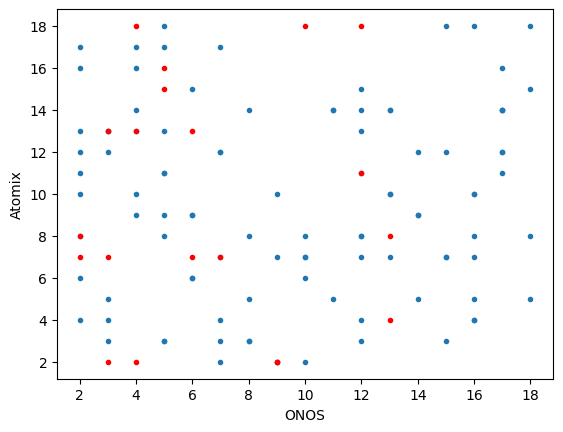

In [2137]:
pop = np.random.randint(config["gene_min_val"],config["gene_max_val"]+1,(2*config["half_pop_size"], 2))
# print(pop)
# print()

final_optimal_placement = []

for generation in range(50):
    
    # evaluate pop
    final_all_combi_placement = all_possible_placement(pop)
    # random_placement, pick_placement_array = random_choose_a_placement_for_each_pop(final_all_combi_placement)
    delay = add_delay(final_all_combi_placement)
    final_delay = calculate_fst(delay)
    fitnesses = fitness_func(final_delay)
    # transition to next generation
    pop, parent_optimal_placement, candidate_optimal_placement = NSGA2_create_next_generation(pop,fitnesses,config)

print(pop)

for parent_optimal_index in parent_optimal_placement:
    final_optimal_placement.append(final_delay[parent_optimal_index])
    
# for candidate_optimal_index in candidate_optimal_placement:
#     final_optimal_placement.append(final_delay[candidate_optimal_index])

print("The result =============")
# print(final_delay) # [(0, [['c1', 3], ['c2', 1], ['a1', 3], ['a2', 2], ['a3', 1]]), (1, [['c1', 3], ['c2', 2], ['a1', 3], ['a2', 2], ['a3', 1]])]
# print(len(final_delay)) # 2
# print(parent_optimal_placement) # [0]
# print(final_optimal_placement) # [(0, [['c1', 3], ['c2', 1], ['a1', 3], ['a2', 2], ['a3', 1]])]
# print(len(final_optimal_placement))
# print(final_optimal_placement[0])  # (0, [['c1', 3], ['c2', 1], ['a1', 3], ['a2', 2], ['a3', 1]])
for op in final_optimal_placement:
    print(op[0],op[3],op[4],op[5])
    print(op[1])


all_pop = np.random.randint(config["gene_min_val"],config["gene_max_val"]+1,(100, 2))
# print(len(all_pop))
final_all_combi_placement = all_possible_placement(all_pop)
# random_placement, pick_placement_array = random_choose_a_placement_for_each_pop(final_all_combi_placement)
delay = add_delay(final_all_combi_placement)
final_delay = calculate_fst(delay)
all_solutions_fitnesses = fitness_func(final_delay)
# print(final_delay)


# for sxsxs in final_delay:
#     print(sxsxs[0],sxsxs[3],sxsxs[4],sxsxs[5])

# print(len(all_solutions_fitnesses))
# print(all_solutions_fitnesses)
print(len(fitnesses))
# print(fitnesses)

for bbbbbbbsss in fitnesses:
    print(bbbbbbbsss)

plt.plot(all_solutions_fitnesses[:,0],all_solutions_fitnesses[:,1],".")
plt.plot(fitnesses[:config["half_pop_size"],0],fitnesses[:config["half_pop_size"],1],".",color="red")
plt.xlabel("ONOS")
plt.ylabel("Atomix")

Text(0.5, 0, 'Flow Setup Time')

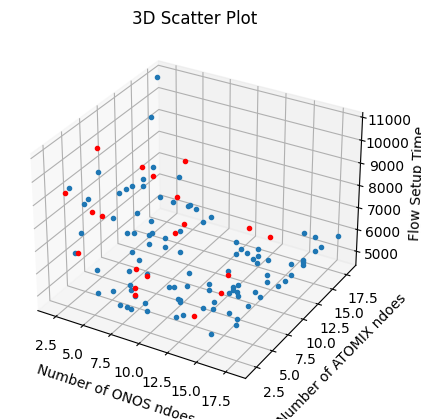

In [2138]:
# fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.grid()
# for i in range(len(fronts)):
#     sorted_front = sorted(fronts[i],key=lambda x : fitnesses[x,2])
#     ax.scatter(fitnesses[sorted_front,0], fitnesses[sorted_front,1], fitnesses[sorted_front,2], s = 15)
#     # plt.plot(fitnesses[sorted_front,0], fitnesses[sorted_front,1], fitnesses[sorted_front,2])

ax.plot(all_solutions_fitnesses[:,0],all_solutions_fitnesses[:,1],all_solutions_fitnesses[:,2],".")
ax.plot(fitnesses[:config["half_pop_size"],0],fitnesses[:config["half_pop_size"],1],fitnesses[:config["half_pop_size"],2],".",color="red")

# ax.scatter(all_solutions_fitnesses[:,0],all_solutions_fitnesses[:,1],all_solutions_fitnesses[:,2], c = 'blue', s = 15)
# ax.scatter(fitnesses[:config["half_pop_size"],0], fitnesses[:config["half_pop_size"],1], fitnesses[:config["half_pop_size"],2], c = 'r', s = 15)
ax.set_title('3D Scatter Plot')
# Set axes label
ax.set_xlabel('Number of ONOS ndoes', labelpad=5)
ax.set_ylabel('Number of ATOMIX ndoes', labelpad=5)
ax.set_zlabel('Flow Setup Time', labelpad=5)
# plt.show()